# UK General Election 2024 Twitter Sentiment Analysis

In this my personal project, I will be scrapping 1000 tweets via the hashtag #ConservativeParty which gives me the most recent tweets about the Conservative Party in the United Kingdom. This will guide me to know peoples opinion about the performance of the current sitting UK Prime Minister Rishi Sunak ahead of the general elections which is not suppose to be held pass 25th of January 2025.

Here, I will be using an open source Twitter/X viewer library called Nitter which was gotten from ntscrapper module to fetch raw 1000 tweets made recently based on the hashtag #ConservativeParty. After fetching, they will be processed and converted to a dataframe where Sentiment Analysis can be applied efficiently.

In [1]:
# Importing the neccessary libraries
import pandas as pd
from ntscraper import Nitter

In [2]:
# Using the Nitter() instance
scraper = Nitter()

Testing instances: 100%|██████████| 32/32 [01:22<00:00,  2.58s/it]


In [4]:
# Fetching the raw tweets with with the object get_tweets()
tweets = scraper.get_tweets('ConservativeParty', mode = 'hashtag', number = 1000)

08-Feb-24 12:20:32 - No instance specified, using random instance https://nitter.catsarch.com
08-Feb-24 12:20:48 - Current stats for ConservativeParty: 18 tweets, 0 threads...
08-Feb-24 12:20:52 - Current stats for ConservativeParty: 32 tweets, 0 threads...
08-Feb-24 12:20:57 - Current stats for ConservativeParty: 49 tweets, 0 threads...
08-Feb-24 12:21:01 - Current stats for ConservativeParty: 67 tweets, 0 threads...
08-Feb-24 12:21:06 - Current stats for ConservativeParty: 84 tweets, 0 threads...
08-Feb-24 12:21:12 - Current stats for ConservativeParty: 103 tweets, 0 threads...
08-Feb-24 12:21:16 - Current stats for ConservativeParty: 119 tweets, 0 threads...
08-Feb-24 12:21:21 - Current stats for ConservativeParty: 132 tweets, 0 threads...
08-Feb-24 12:21:25 - Current stats for ConservativeParty: 142 tweets, 0 threads...
08-Feb-24 12:21:30 - Current stats for ConservativeParty: 154 tweets, 0 threads...
08-Feb-24 12:21:35 - Current stats for ConservativeParty: 159 tweets, 0 threads..

In [5]:
# Looping through our fetched tweet and getting link, text, date, likes, and tweets
processed_tweets = list()

for x in tweets['tweets']:
    data = [x['link'], x['text'], x['date'], x['stats']['likes'], x['stats']['comments']]
    processed_tweets.append(data)

In [6]:
# Converting to dataframe
data = pd.DataFrame(processed_tweets, columns = ['link', 'text', 'date', 'No_of_Likes', 'No_of_tweets'])

In [8]:
# Loading the first 10 rows
data.head(10)

,link,text,date,No_of_Likes,No_of_tweets
0,https://twitter.com/MattMJones00/status/175555...,Lesson of the day: we need complete #electora...,"Feb 8, 2024 · 11:43 AM UTC",0,0
1,https://twitter.com/simon_ball46/status/175555...,https://nitter.catsarch.com/OBR_UK/status/1635...,"Feb 8, 2024 · 11:17 AM UTC",0,0
2,https://twitter.com/MFuturama/status/175554328...,#ourmoneyisnotyours Put canada first and step ...,"Feb 8, 2024 · 10:45 AM UTC",0,0
3,https://twitter.com/anneryan21/status/17555425...,#Shame seems to be in short supply in the #Con...,"Feb 8, 2024 · 10:42 AM UTC",0,0
4,https://twitter.com/nicktweet/status/175553696...,#TorySewageParty 'takes back control...' unles...,"Feb 8, 2024 · 10:20 AM UTC",0,0
5,https://twitter.com/DavidBa52816552/status/175...,BJ is the reason the #ConservativeParty is whe...,"Feb 8, 2024 · 10:13 AM UTC",0,0
6,https://twitter.com/Lins1969_/status/175553346...,https://www.instagram.com/reel/C3BsE7aOg03/?ig...,"Feb 8, 2024 · 10:06 AM UTC",0,0
7,https://twitter.com/BaluReddyUKing/status/1755...,I have voted for the Conservative Party in eve...,"Feb 8, 2024 · 10:05 AM UTC",3,1
8,https://twitter.com/SirCCodpiece/status/175552...,#Tory #Conservatives #ConservativeParty Is thi...,"Feb 8, 2024 · 9:47 AM UTC",0,0
9,https://twitter.com/Iamthe6ofClubs/status/1755...,When will they realise you can't dismiss the n...,"Feb 8, 2024 · 9:47 AM UTC",1,0


In [9]:
# Converting to csv and downloading by using the FileLink library
from IPython.display import FileLink

In [11]:
csv_file = 'conservativePartyTweets.csv'
data.to_csv(csv_file, index=False)

In [12]:
FileLink(csv_file)

/Users/wisdomadike/conservativePartyTweets.csv

### Sentiment Analysis

In [1]:
# Importing the neccessary library and tool kit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wisdomadike/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/wisdomadike/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/wisdomadike/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/wisdomadike/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/wisdomadike/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
data = pd.read_csv('conservativePartyTweets.csv')

In [3]:
# Lets check the shape of the dataset we scrapped
data.shape

(1000, 5)

In [4]:
# Describing the dataset
data.describe()

,No_of_Likes,No_of_tweets
count,1000.000000,1000.000000
mean,4.953000,0.666000
std,75.207932,8.426711
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,2241.000000,238.000000


In [5]:
# Checking for missing values
data.isnull().sum()

link            0
text            0
date            0
No_of_Likes     0
No_of_tweets    0
dtype: int64

In [6]:
# Knowing the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   link          1000 non-null   object
 1   text          1000 non-null   object
 2   date          1000 non-null   object
 3   No_of_Likes   1000 non-null   int64 
 4   No_of_tweets  1000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


#### Preprocessing text for Sentiment Analysis

In [7]:
stop_words = set(stopwords.words('english'))

In [8]:
# A function for a corpus
def preprocess_text(text):
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
    preprocessed_text = ' '.join(stemmed_text)
    return preprocessed_text

In [9]:
data['text'] = data['text'].apply(preprocess_text)

data.head()

,link,text,date,No_of_Likes,No_of_tweets
0,https://twitter.com/MattMJones00/status/175555...,lesson day need complet electoralreform parlia...,"Feb 8, 2024 · 11:43 AM UTC",0,0
1,https://twitter.com/simon_ball46/status/175555...,http nitter catsarch com obr uk statu 16359989...,"Feb 8, 2024 · 11:17 AM UTC",0,0
2,https://twitter.com/MFuturama/status/175554328...,ourmoneyisnotyour put canada first step right ...,"Feb 8, 2024 · 10:45 AM UTC",0,0
3,https://twitter.com/anneryan21/status/17555425...,shame seem short suppli conservativeparti empathi,"Feb 8, 2024 · 10:42 AM UTC",0,0
4,https://twitter.com/nicktweet/status/175553696...,torysewageparti 'take back control ' unless wa...,"Feb 8, 2024 · 10:20 AM UTC",0,0


In [10]:
# Using sentiment intensity analyzer from vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [11]:
# Lets extract the polarity scores from the dictionary and create new columns within our dataframe
data['compound'] = [sentiment.polarity_scores(x)['compound'] if isinstance(x, str) else 0.0 for x in data['text']]
data['neg'] = [sentiment.polarity_scores(x)['neg'] if isinstance(x, str) else 0.0 for x in data['text']]
data['neu'] = [sentiment.polarity_scores(x)['neu'] if isinstance(x, str) else 0.0 for x in data['text']]
data['pos'] = [sentiment.polarity_scores(x)['pos'] if isinstance(x, str) else 0.0 for x in data['text']]

In [12]:
data.head()

,link,text,date,No_of_Likes,No_of_tweets,compound,neg,neu,pos
0,https://twitter.com/MattMJones00/status/175555...,lesson day need complet electoralreform parlia...,"Feb 8, 2024 · 11:43 AM UTC",0,0,0.5106,0.084,0.709,0.207
1,https://twitter.com/simon_ball46/status/175555...,http nitter catsarch com obr uk statu 16359989...,"Feb 8, 2024 · 11:17 AM UTC",0,0,0.0000,0.000,1.000,0.000
2,https://twitter.com/MFuturama/status/175554328...,ourmoneyisnotyour put canada first step right ...,"Feb 8, 2024 · 10:45 AM UTC",0,0,0.0000,0.000,1.000,0.000
3,https://twitter.com/anneryan21/status/17555425...,shame seem short suppli conservativeparti empathi,"Feb 8, 2024 · 10:42 AM UTC",0,0,-0.4767,0.383,0.617,0.000
4,https://twitter.com/nicktweet/status/175553696...,torysewageparti 'take back control ' unless wa...,"Feb 8, 2024 · 10:20 AM UTC",0,0,0.0772,0.000,0.885,0.115


In [13]:
desc = data[['compound', 'neg', 'neu', 'pos']].describe()
desc

,compound,neg,neu,pos
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.004716,0.086170,0.828388,0.085432
std,0.423566,0.126255,0.167644,0.122505
min,-0.976400,0.000000,0.204000,0.000000
25%,-0.255800,0.000000,0.720000,0.000000
50%,0.000000,0.000000,0.849500,0.000000
75%,0.296000,0.144500,1.000000,0.148250
max,0.955900,0.796000,1.000000,0.714000


<Axes: xlabel='compound', ylabel='Count'>

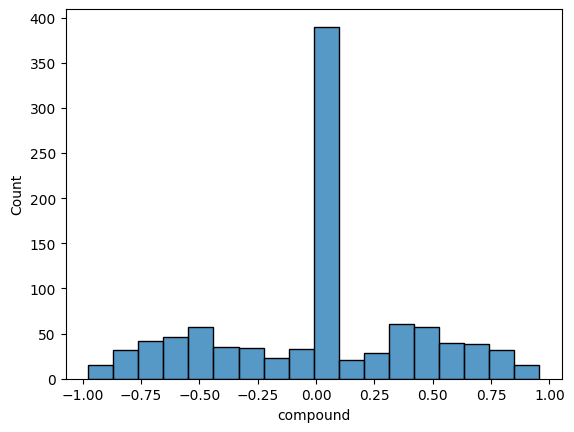

In [14]:
sns.histplot(data.compound)

<Axes: xlabel='neu', ylabel='Count'>

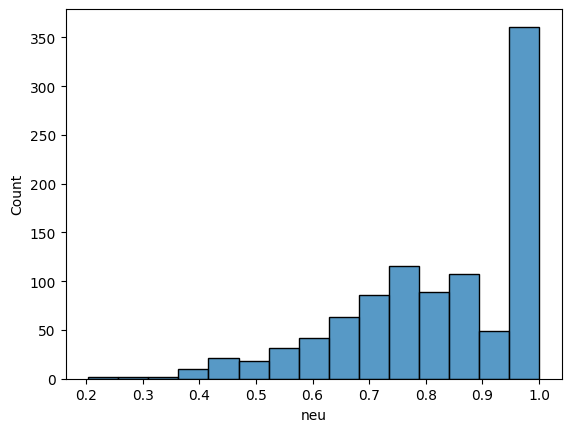

In [15]:
sns.histplot(data.neu)

<Axes: xlabel='pos', ylabel='Count'>

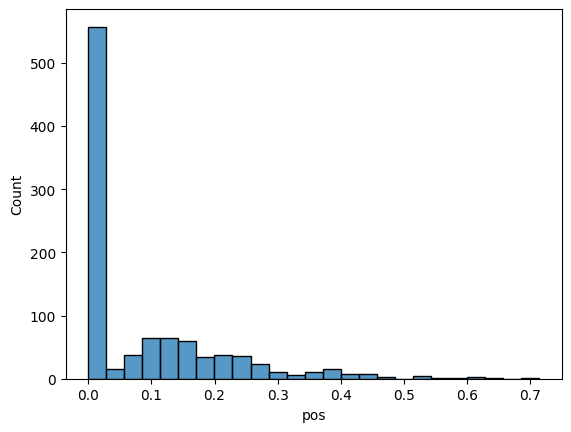

In [16]:
sns.histplot(data.pos)

<Axes: xlabel='neg', ylabel='Count'>

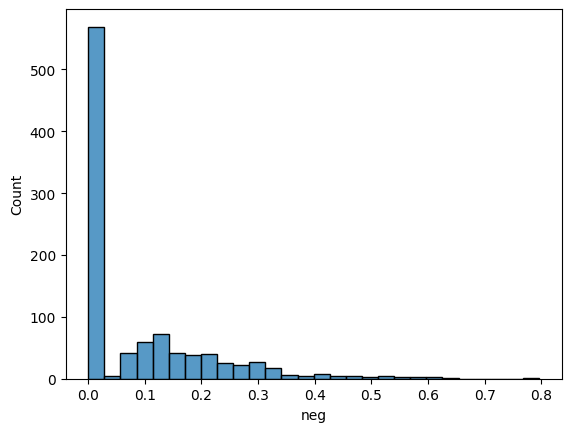

In [17]:
sns.histplot(data.neg)

In [18]:
# Calculating the sentiment scores
data['compound'] = data['text'].apply(lambda x: sentiment.polarity_scores(x)['compound'])

In [19]:
# Making subsets based on the calculated sentiment scores
positive_review_subset = data.loc[data['compound'] > 0]
negative_review_subset = data.loc[data['compound'] <= 0]

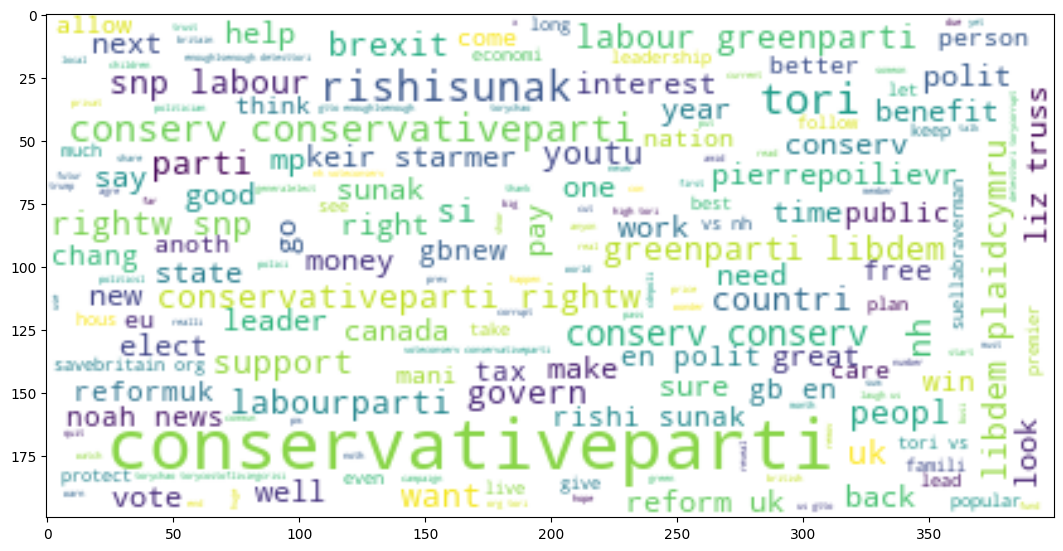

In [24]:
# Generating word cloud for the positive reviews
positive_tokens = ' '.join(positive_review_subset['text'])
positive_wordcloud = WordCloud(background_color='white').generate(positive_tokens)

plt.figure(figsize=(13, 13))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.show()

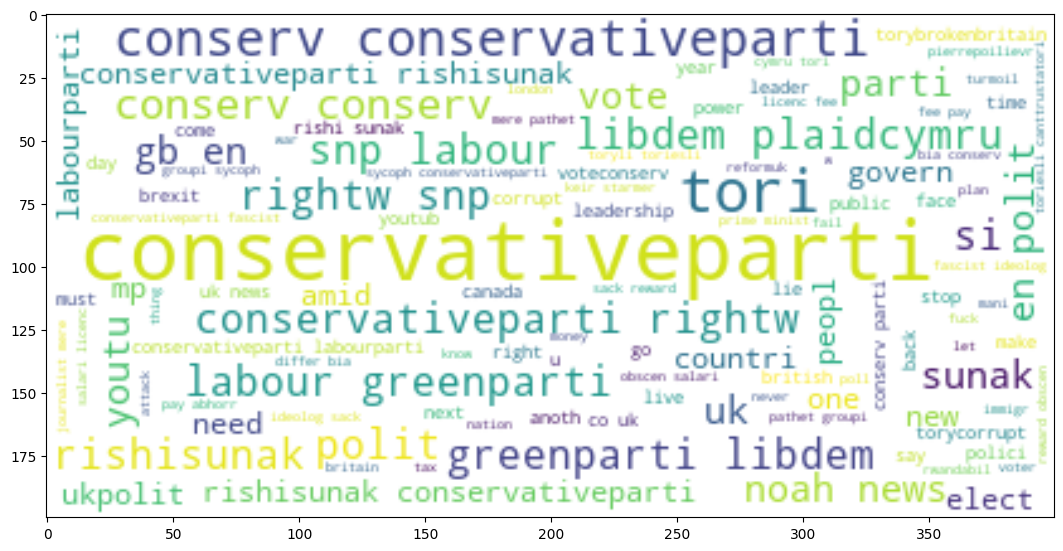

In [26]:
# Generating word cloud for the negative reviews
negative_tokens = ' '.join(negative_review_subset['text'])
negative_wordcloud = WordCloud(background_color='white').generate(negative_tokens)

plt.figure(figsize=(13, 13))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.show()

## ANALYSIS

From the above word cloud, there are most frequent words displayed boldly. In the negeative review, words like "tori", "elect", "vote", "govern", "labour", "greenparti", "libdem", "corrupt", "conservative", "sunak", "torycorrupt" played a major role in this analysis. The libdem also known as the Liberal democrats, the green party and the Labour are one of the major opponents of the sitting and current Conservatives. This highlights a change in their political system as they want another party to fill in the space at the Downing Street. Highlighted words like "torycorrupt" and "govern" talks about the corruption in the system and how its affecting the governance of people. Rishi Sunak is the head of the Conservative Party which has been in power since 2010 (thats over a decade). 

The positive review contains words like "liz truss", "tax", "brexit", "keir starmer", "labour" and so on. Though, Rishi Sunak and his party gots loads of positivity but it isn't enough to cement their place in the forthcoming elections. The word Keir Starmer which happens to be the leader of the Labour Party should be seen as a big opposition in the next polls. Having 'liz truss' in the positive review also signified that they enjoyed the few days of Liz Truss before she was succeeded by Rishi Sunak.